## Modelldiagnose
----------------------------------------

In [108]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from random import sample
from scipy.stats import t
from scipy.stats import chi2
from scipy import stats
import scipy.stats
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


<a href="https://en.wikipedia.org/wiki/Regression_validation">Regressionsvalidierung</a> oder <a href="https://en.wikipedia.org/wiki/Regression_diagnostic">Regressionsdiagnose</a> ist eine Reihe von Verfahren, die zur Bewertung der numerischen Ergebnisse einer Regressionsanalyse angewandt werden. Die Verfahren umfassen Methoden der grafischen und quantitativen Analyse oder formale statistische Hypothesentests. In diesem Abschnitt konzentrieren wir uns auf die beiden wichtigsten Methoden, die grafische und die quantitative Analyse. Statistische Hypothesentests für Regressionsprobleme finden Sie im Abschnitt über *Hypothesentests*.

### Bestimmungskoeffizient

Der <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">Bestimmungskoeffizient</a>, auch als $R^2$ bezeichnet, ist der Anteil der Variation der beobachteten Werte, der durch die Regressionsgleichung erklärt wird. Mit anderen Worten: $R^2$ ist ein statistisches Maß dafür, wie gut die Regressionsgerade die realen Datenpunkte annähert; es ist also ein Maß für die Anpassungsfähigkeit des Modells.

Die Gesamtvariation der Antwortvariablen $y$
basiert auf der Abweichung jedes beobachteten Wertes $y_i$ vom Mittelwert $\bar y$. Diese Größe wird als **Gesamtsumme der Quadrate, $SST$**, bezeichnet und ist gegeben durch

$$SST = \sum (y_i - \bar y)^2\text{.}$$

Diese Gesamtsumme der Quadrate ($SST$) kann in zwei Teile zerlegt werden: die durch die Regressionslinie erklärte Abweichung $\hat y_i- \bar y$ und die verbleibende unerklärte Abweichung $y_i-\hat y_i$. Folglich wird der Anteil der Variation, der durch die Regression erklärt wird, als **Summe der Quadrate aufgrund der Regression**, $SSR$, bezeichnet und ist gegeben durch

$$SSR = \sum (\hat y_i- \bar y)^2\text{.}$$

Das Verhältnis zwischen der Summe der Quadrate aufgrund der Regression ($SSR$) und der Gesamtsumme der Quadrate ($SST$) wird als Bestimmtheitsmaß bezeichnet und mit $R^2$ angegeben.

$$R^2 = \frac{SSR}{SST}$$

$R^2$ liegt zwischen $0$ und $1$. Ein Wert nahe $0$ deutet darauf hin, dass die Regressionsgleichung nicht in der Lage ist, die Daten zu erklären. Ein $R^2$ von $1$ zeigt an, dass die Regressionsgerade perfekt zu den Daten passt.

Der Vollständigkeit halber wird die Variation in den beobachteten Werten der Reaktionsvariablen, die nicht durch die Regression erklärt wird, als **Summe der quadrierten Fehler der Vorhersage** ($SSE$) bezeichnet und ist gegeben durch

$$SSE = \sum (y_i-\hat y_i)^2\text{.}$$

Erinnern Sie sich, dass die $SSE$-Größe minimiert wird, um die beste Regressionslinie zur Beschreibung der Daten zu erhalten, auch bekannt als die <a href="https://en.wikipedia.org/wiki/Ordinary_least_squares">Methode der gewöhnlichen kleinsten Quadrate</a> ($OLS$).

### Die Methode `summary()`

Eine grundlegendes Mittel für die Regressionsdiagnose in Python ist die Methode `summary()`. Die Funktion `OLS()` gibt ein Modellobjekt zurück. Dieses `OLS()`-Objekt enthält die Modelleigenschaften, die durch Anwendung der Methode `summary()` untersucht werden können.

Zu Demonstrationszwecken wird dasselbe Modell wie im vorherigen Abschnitt verwendet.

In [109]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

n = 12

sample_idx = students.sample(n, random_state=2)
data = pd.DataFrame(sample_idx['height'])
data['weight'] = sample_idx['weight']

x = data['height']
y = data['weight']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\zak\anaconda3\envs\srh\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 17 May 2022   Prob (F-statistic):           8.05e-07
Time:                        18:25:34   Log-Likelihood:                -22.602
No. Observations:                  12   AIC:                             49.20
Df Residuals:                      10   BIC:                             50.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.4432     10.057     -3.922      0.003     -61.851     -17.036
height         0.6508      0.060     10.766      0.000       0.516       0.785
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                0.923
Skew:                           0.110   Prob(JB):                        0.630
Kurtosis:                       1.659   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Die Ausgabe der Methode `summary()` beginnt mit einer Wiederholung der abhängigen Variable und der angewandten Methode (in diesem Fall $OLS$).

- Die nächste Zeile zeigt $R^2$, den quadrierten <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson Korrelationskoeffizienten</a>, auch bekannt als <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">Bestimmtheitskoeffizient</a> und das angepasste $R^2$, ein statistisches Maß, das für die MerkmalsauswahBestimmtheitskoeffizientt werden kann.

- Die darauf folgenden Zeilen zeigen die $F$-Statistik, die Anzahl der Beobachtungen (Datenpunkte) und Freiheitsgrade.

- In den nächsten Zeilen werden der Regressionskoeffizient (unter `height`) und der Achsenabschnitt (unter `const`) angegeben, außerdem für jeden von ihnen der Standardfehler, die $t$-Werte und die $p$-Werte.


### Diagnostische Plots

Es ist wichtig zu wissen, dass Sie eine lineare Regressionsanalyse mit dem Softwarepaket Python oder einer anderen Statistiksoftware durchführen können, die eine Reihe von Zahlen, einschließlich eines $p$-Werts, ergibt, so dass Sie sofort feststellen können, ob die Ergebnisse signifikant waren (oder nicht). Sind wir mit der Angabe der Signifikanz der Ergebnisse fertig?

Nehmen wir einen sehr berühmten Datensatz, das so genannte <a href="https://en.wikipedia.org/wiki/Anscombe's_quartet">Anscombe-Quartett</a>. Das Anscombe-Quartett besteht aus vier Datensätzen und hat die folgende Form:

|||||||||
|--- |--- |--- |--- |--- |--- |--- |--- |
|x1|y1|x2|y2|x3|y3|x4|y4|
|10 |8,04|10|9,14|10|7,46|8|6,58|
|8|6,95|8|8,14|8|6,77|8|5,76|
|13|7,58|13|8,74|13|12,74|8|7,71|
|9|8,81|9|8,77|9|7,11|8|8,84|
|11|8,33|11|9,26|11|7,81|8|8,47|
|14|9,96|14|8,1|14|8,84|8|7,04|
|6|7,24|6|6,13|6|6,08|8|5,25|
|4|4,26|4|3,1|4|5,39|19|12,5|
|12|10,84|12|9,13|12|8,15|8|5,56|
|7|4,82|7|7,26|7|6,42|8|7,91|
|5|5,68|5|4,74|5|5,73|8 |6,89|

Das Anscombe-Quartett wird oft verwendet um die Unterschiede zwischen grafischer und statistischer Auswertung hervorzuheben. Wir geben den Datensatz in Python ein.

In [110]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

Nun berechnen wir einige deskriptive statistische Maße für jedes der vier $(x,y)$-Paare. Zunächst berechnen wir den Mittelwert für jedes einzelne $x$ und $y$ im Datensatz.

In [111]:
print(f"mean x1: {round(np.mean(x1),3)} | mean y1: {round(np.mean(y1),3)}")
print(f"mean x2: {round(np.mean(x2),3)} | mean y2: {round(np.mean(y2),3)}")
print(f"mean x3: {round(np.mean(x3),3)} | mean y3: {round(np.mean(y3),3)}")
print(f"mean x4: {round(np.mean(x4),3)} | mean y4: {round(np.mean(y4),3)}")

mean x1: 9.0 | mean y1: 7.501
mean x2: 9.0 | mean y2: 7.501
mean x3: 9.0 | mean y3: 7.5
mean x4: 9.0 | mean y4: 7.501


Die Werte stimmen entweder perfekt überein oder liegen sehr nahe beieinander!!

Jetzt berechnen wir die Varianz jedes $(x,y)$ Paares.

In [112]:
print('var x 1 :',np.var(x1))
print('var y 1 :',np.var(y1))
print('var x 2 :',np.var(x2))
print('var y 2 :',np.var(y2))
print('var x 3 :',np.var(x3))
print('var y 3 :',np.var(y3))
print('var x 4 :',np.var(x4))
print('var y 4 :',np.var(y4))

var x 1 : 10.0
var y 1 : 3.7520628099173554
var x 2 : 10.0
var y 2 : 3.752390082644628
var x 3 : 10.0
var y 3 : 3.747836363636364
var x 4 : 10.0
var y 4 : 3.7484082644628103


Sie sind zwar nicht exakt gleich, aber definitiv sehr nahe beieinander. Schließlich erstellen wir mit der Funktion `linregress()` ein lineares Modell für jede Teilmenge und berechnen die Koeffizienten des Modells und $R^2$, das Bestimmtheitsmaß.

In [113]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3, y3)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x4, y4)

print(f"I - Equation: {round(slope1,2)}x + {round(intercept1,2)}, R : {r_value1}, P value: {round(p_value1,2)}, Std error: {round(std_err1,2)}")
print(f"II - Equation: {round(slope2,2)}x + {round(intercept2,2)}, R : {r_value2}, P value: {round(p_value2,2)}, Std error: {round(std_err2,2)}")
print(f"III - Equation: {round(slope3,2)}x + {round(intercept3,2)}, R : {r_value3}, P value: {round(p_value3,2)}, Std error: {round(std_err3,2)}")
print(f"IV - Equation: {round(slope4,2)}x + {round(intercept4,2)}, R : {r_value4}, P value: {round(p_value4,2)}, Std error: {round(std_err4,2)}")

I - Equation: 0.5x + 3.0, R : 0.8164205163448399, P value: 0.0, Std error: 0.12
II - Equation: 0.5x + 3.0, R : 0.816236506000243, P value: 0.0, Std error: 0.12
III - Equation: 0.5x + 3.0, R : 0.8162867394895982, P value: 0.0, Std error: 0.12
IV - Equation: 0.5x + 3.0, R : 0.816521436888503, P value: 0.0, Std error: 0.12


Erstaunlich! Sie sind fast identisch! Und jetzt $R^2$:

In [114]:
print('r^2 1 :',r_value1**2)
print('r^2 2 :',r_value2**2)
print('r^2 3 :',r_value3**2)
print('r^2 4 :',r_value4**2)

r^2 1 : 0.666542459508775
r^2 2 : 0.6662420337274847
r^2 3 : 0.6663240410665591
r^2 4 : 0.6667072568984656


Wow, was für eine Analyse! Wir haben eine Menge verschiedener statistischer Methoden auf die vier Datensätze angewandt, und ehrlich gesagt, sie sehen einander sehr ähnlich.

Sind wir jetzt mit unserer Analyse fertig? Nein, noch nicht! Egal was wir tun, wir sollten immer überprüfen, ob das Modell für die Daten gut funktioniert. Eine einfache Möglichkeit, dies zu tun, ist die Visualisierung der Daten. Lassen Sie uns den Anscombe-Datensatz einschließlich der Regressionslinie grafisch darstellen.

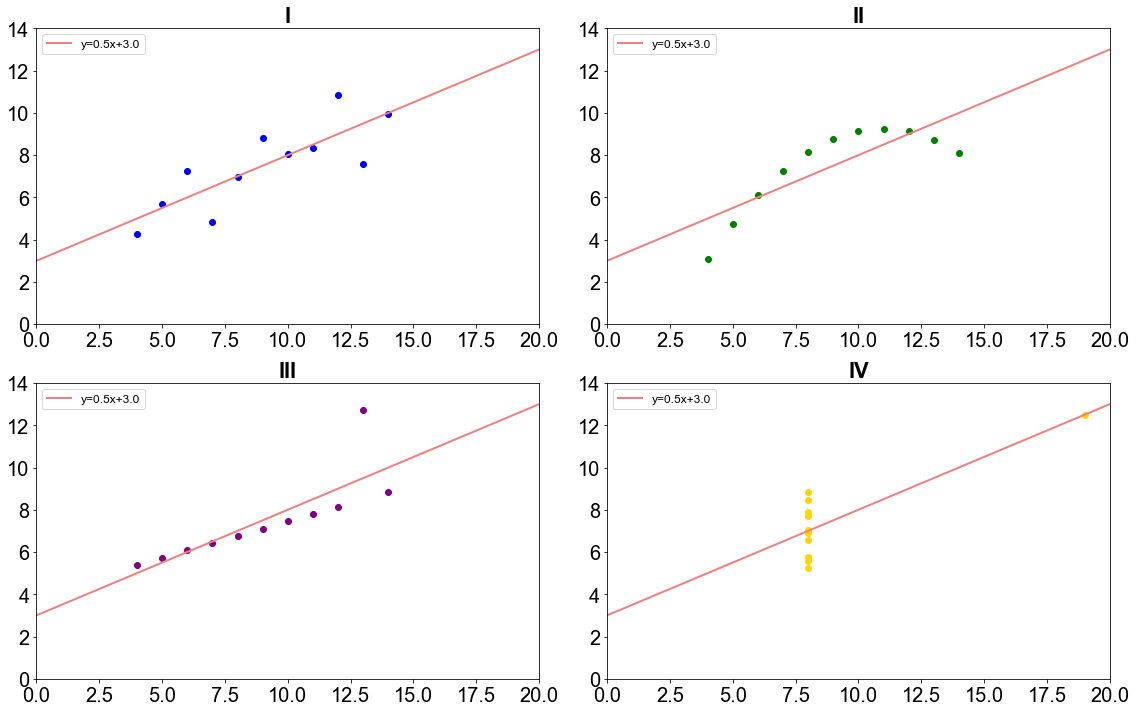

In [115]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
p1, p0 = np.polyfit(x1, y1, deg=1)  # Linear regression for I

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
p3, p2 = np.polyfit(x2, y2, deg=1)  # Linear regression for II

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
p5, p4 = np.polyfit(x3, y3, deg=1)  # Linear regression for III

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
p7, p6 = np.polyfit(x4, y4, deg=1)  # Linear regression for IV

# Create the figure and the axes
fig, axs = plt.subplots(2, 2)

# First scatter plot I
axs[0, 0].scatter(x1, y1, c = 'blue')
axs[0, 0].set_title("I", loc='center',fontweight='bold')
axs[0, 0].axline(xy1=(0, p0), slope=p1, lw=2,color='lightcoral',label=f'y={round(p1,2)}x+{round(p0,2)}')
axs[0, 0].legend()
axs[0, 0].set_ylim(0,14)
axs[0, 0].set_xlim(0,20)

# Second scatter plot II
axs[0, 1].scatter(x2, y2, c = 'green')
axs[0, 1].set_title("II", loc='center',fontweight='bold')
axs[0, 1].axline(xy1=(0, p2), slope=p3, lw=2,color='lightcoral',label=f'y={round(p3,2)}x+{round(p2,2)}')
axs[0, 1].legend()
axs[0, 1].set_ylim(0,14)
axs[0, 1].set_xlim(0,20)

# Third scatter plot III
axs[1, 0].scatter(x3, y3, c = 'purple')
axs[1, 0].set_title("III", loc='center',fontweight='bold')
axs[1, 0].axline(xy1=(0, p4), slope=p5, lw=2,color='lightcoral',label=f'y={round(p5,2)}x+{round(p4,2)}')
axs[1, 0].legend()
axs[1, 0].set_ylim(0,14)
axs[1, 0].set_xlim(0,20)

# Fourth scatter plot IV
axs[1, 1].scatter(x4, y4, c = '#FFD700')
axs[1, 1].set_title("IV", loc='center',fontweight='bold')
axs[1, 1].axline(xy1=(0, p6), slope=p7, lw=2,color='lightcoral',label=f'y={round(p7,2)}x+{round(p6,2)}')
axs[1, 1].legend()
axs[1, 1].set_ylim(0,14)
axs[1, 1].set_xlim(0,20)

plt.tight_layout()

Was für eine Überraschung! Das wichtigste Ergebnis der Übung ist die Erkenntnis, dass wir auf viele verschiedene Arten prüfen müssen, ob ein Modell für Daten gut funktioniert. Wir achten auf Regressionsergebnisse wie Steigungskoeffizienten, $p$-Werte oder $R^2$, die uns sagen, wie gut ein Modell die gegebenen Daten darstellt. Das ist jedoch nicht die ganze Geschichte. Wir müssen auch visuelle Diagnosen anwenden. Die visuelle Inspektion hilft bei der Bewertung, ob die Annahmen der linearen Regression erfüllt sind, oder bei der Ermittlung von <a href="https://en.wikipedia.org/wiki/Outlier">Ausreißern</a> und/oder <a href="https://en.wikipedia.org/wiki/Influential_observation">statistisch bedeutsame Beobachtungen</a> und so genannten <a href="https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Linear-Regression/Simple-Linear-Regression/Model-Diagnostic/index.html">Hebelpunkten</a>, die das numerische Ergebnis der Regressionsanalyse beeinflussen.

### Analyse der Residuen

Ein <a href="https://en.wikipedia.org/wiki/Errors_and_residuals">Residuum</a> eines beobachteten Wertes ist die Differenz zwischen dem beobachteten Wert und dem geschätzten Wert $(y_i- \hat y_i)$. Es handelt sich um die Residuen, die nach der Anpassung eines Modells an die Daten übrig bleiben. Die **Summe der quadrierten Vorhersagefehler** ($SSE$), auch bekannt als die **Summe der quadrierten Residuen** oder die **Fehlersumme der Quadrate**, ist ein Indikator dafür, wie gut ein Modell die Daten darstellt.

Wenn die absoluten Residuen, definiert für die Beobachtung $x_i$ als $e_i=y_i- \hat y_i$ definiert sind, ungewöhnlich groß sind, kann es sein, dass die Beobachtung aus einer anderen Grundgesamtheit stammt oder dass bei der Durchführung oder Aufzeichnung der Beobachtung ein Fehler aufgetreten ist.

![Alt-Text](98_anscombe.png)

Die beiden obigen Diagramme zeigen, dass ein Datenpunkt in Anscombes Datensatz Nr. $3$ (rechtes Diagramm) ein ungewöhnlich großes Residuum aufweist. Ein solcher Datenpunkt erfordert besondere Aufmerksamkeit, da er die Regressionsanalyse beeinflusst. Es gibt keine allgemeingültige Regel, wie mit Ausreißern umzugehen ist, aber je nach den Fachkenntnissen des Forschers kann es Fälle geben, in denen man beschließt, einen solchen Ausreißer aus der Analyse auszuschließen.

Darüber hinaus können wir die Residuen analysieren, um zu prüfen, ob die Annahmen der linearen Regression erfüllt sind. Regressionsresiduen sollten annähernd normalverteilt sein, d. h. die Regression sollte die Struktur erklären, und was übrig bleibt, sollte nur Rauschen sein, das durch Messfehler oder viele kleine unkorrelierte Faktoren verursacht wird. Die Normalität der Residuen kann grafisch überprüft werden, indem man die Residuen gegen die Werte der Prädiktorvariablen aufträgt. In einem solchen **Residuen-Plot** sollten die Residuen zufällig um $0$ streuen
und die Variation um $0$ sollte gleich sein.

Vor der Darstellung der Residuen ist es üblich, die Residuen zu standardisieren. Python bietet die Möglichkeit mit `get_influence()` auf die standardisierten Residuen zuzugreifen (`influence = model.get_influence()
` und `standardized_residuals = influence.resid_studentized_internal`) und alternativ kann man mit `stud_res = model.outlier_test()` die <a href="https://en.wikipedia.org/wiki/Studentized_residual">studentisierten Residuen</a> berechnen.

Wenn die Annahmen für Regressionsschlussfolgerungen erfüllt sind, sollten die folgenden zwei Bedingungen gelten (Weiss 2010):
- Eine Darstellung der Residuen (Residuenplot) gegen die Werte der Prädiktorvariablen sollte ungefähr in ein horizontales Band fallen, das um die $x$-Achse zentriert und symmetrisch ist.

- Eine Normalwahrscheinlichkeitsdarstellung der Residuen sollte in etwa linear sein.

![Alt-Text](98_anscombe2.png)

Nur in der obersten Grafik sind die Residuen relativ gut um den Nullpunkt verteilt, während dies in den beiden unteren Grafiken nicht der Fall ist, was darauf hindeutet, dass die linearen Modellannahmen für dieses Modell nicht erfüllt sind.

![Alt-Text](98_anscombe3.png)

Die Normalwahrscheinlichkeitsdiagramme, die oft als <a href="https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot">Q-Q-Diagramme</a> bezeichnet werden, zeigen, dass nur im linken Diagramm die Datenpunkte in etwa auf eine gerade Linie fallen. Dies ist bei den anderen Diagrammen nicht der Fall, was darauf hindeutet, dass die Annahmen des linearen Modells nicht erfüllt sind.

### Ausreißer und relevante Punkte

**Ausreißer** sind Punkte, die aus der Wolke der Datenpunkte herausfallen. Ausreißer, die horizontal von der Mitte der Wolke wegfallen und die Neigung der Regressionslinie nicht beeinflussen, werden als **Leverage-Punkte** (Hebelpunkte) bezeichnet. Ausreißer, die die Steigung der Regressionsgeraden tatsächlich beeinflussen, werden als **relevante Punkte** bezeichnet, bei denen es sich in der Regel um hohe Leverage-Punkte handelt.

Wir wollen einen Beispielsdatensatz erstellen, um das Konzept der statistisch bedeutsamen Beobachtungen zu untersuchen.

model1
const    7.581154
0        1.948272
dtype: float64
model2_inf
const   -0.675352
0        4.100405
dtype: float64
model3_lev
const    10.559320
0         1.913944
dtype: float64
model4_all
const    2.553163
0        3.999667
dtype: float64


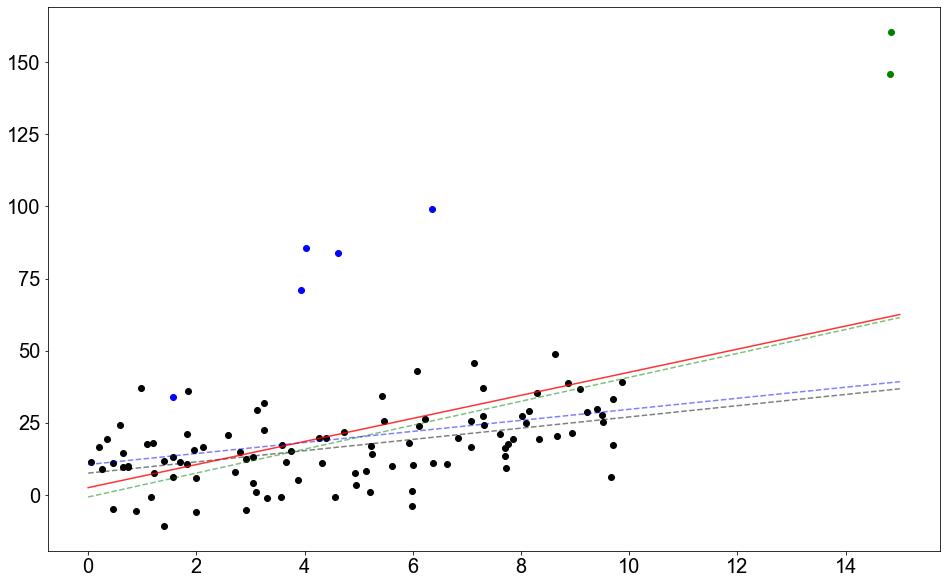

In [116]:
# random data generation
n = 100
beta0 = 5
beta1 = 2.5


np.random.seed(42)

x = np.random.uniform(0,10,n) 

y = beta0 + beta1*x + np.random.normal(0,12,n) # add random noise

# generate leverage points
n_lev = math.floor(n*0.05)

x_lev = np.random.uniform( 0, 8,n_lev)

y_lev = beta0**1.5 + beta1**3*x_lev + np.random.normal( 0, 12, n_lev) # add random noise

# generate influential points
n_inf = math.floor(n*0.02)

x_inf = np.random.uniform( 10, 15, n_inf)

y_inf = beta0 + beta1**2.5*x_inf + np.random.normal(0, 12, n_inf) # add random noise

# concatenate data sets
x_out = pd.DataFrame(x)
y_out = pd.DataFrame(y)

# influential points
x_inf_df = pd.DataFrame(x_inf)
x_out_inf = pd.concat([x_out, x_inf_df])
y_inf_df = pd.DataFrame(y_inf)
y_out_inf = pd.concat([y_out, y_inf_df])

# leverage points
x_lev_df = pd.DataFrame(x_lev)
x_out_lev = pd.concat([x_out, x_lev_df])
y_lev_df = pd.DataFrame(y_lev)
y_out_lev = pd.concat([y_out, y_lev_df])

# all points
x_out_all = pd.DataFrame(x)
y_out_all = pd.DataFrame(y)

x_out_all = pd.concat([x_out_all, x_inf_df])
x_out_all = pd.concat([x_out_all, x_lev_df])
x_out_all2 = x_out_all

y_out_all = pd.concat([y_out_all, y_inf_df])
y_out_all = pd.concat([y_out_all, y_lev_df])



x_out = sm.add_constant(x_out)
model1 = sm.OLS(y_out, x_out).fit()

x_out_inf = sm.add_constant(x_out_inf)
model2 = sm.OLS(y_out_inf, x_out_inf).fit()

x_out_lev = sm.add_constant(x_out_lev)
model3 = sm.OLS(y_out_lev, x_out_lev).fit()

x_out_all = sm.add_constant(x_out_all)
model4 = sm.OLS(y_out_all, x_out_all).fit()

# Print out the statistics
print('model1')
print(model1.params)
print('model2_inf')
print(model2.params)
print('model3_lev')
print(model3.params)
print('model4_all')
print(model4.params)



plt.scatter(x_inf,y_inf,color='green')
plt.scatter(x_lev,y_lev,color='blue')
plt.scatter(x,y,color='k')
plt.plot([0,15],[7.581154 , 36.805234],color = 'k',alpha = 0.5,linestyle='--')
plt.plot([0,15],[-0.675352 , 61.506075],color = 'green',alpha = 0.5,linestyle='--')
plt.plot([0,15],[10.559320 , 39.26848],color = 'blue',alpha = 0.5,linestyle='--')
plt.plot([0,15],[2.553163 , 62.548168],color = 'red',alpha = 0.8)

Die obige Abbildung zeigt deutlich die Auswirkungen der verschiedenen Arten von Ausreißern. Die schwarze gestrichelte Linie zeigt die Regressionslinie ohne Ausreißer, die blaue gestrichelte Linie zeigt die Regressionslinie, wenn die blauen Hebelpunkte enthalten sind, die grüne gestrichelte Linie zeigt die Regressionslinie, wenn die grünen relevanten Punkte enthalten sind, und die rote Linie zeigt die endgültige Regressionslinie, wenn alle Daten enthalten sind. Offensichtlich haben die grünen Punkte den größten Einfluss auf die Steigung der Regressionslinie!

### Leverage

Die <a href="https://en.wikipedia.org/wiki/Leverage_(statistics)">Leverage</a> einer Beobachtung zeigt an, ob sie das Regressionsmodell beeinflussen kann. Diese Beobachtungen sind nicht notwendigerweise ein Fehler, aber sie sollten identifiziert und überprüft werden. Die Leverage wird durch den **$H$-Wert** gemessen, der den Gesamteinfluss einer einzelnen Beobachtung auf die Modellvorhersagen misst (Dalgaard 2008). Der $H$-Wert nimmt Werte zwischen $0$ und $1$ an. Ein Punkt mit einer Hebelwirkung von Null hat keinen Einfluss auf das Regressionsmodell. Je höher der $H$-Wert ist, desto größer ist der Einfluss des betreffenden Punktes auf das Regressionsmodell.

In Python wird der Leverage-Wert mit den Methoden `get_influence().summary_frame()` berechnet und in einem Dataframe zusammengefasst. Die Methode gibt den $H$-Wert für jeden einzelnen Datenpunkt zurück. Werte deren Leverage mehr als $3$-mal grösser ist als die durchschnittlichen Leverage ($\bar h$) werden als Influential Points betrachtet. Die durchschnittlichen Leverage ist gegeben durch $\bar h=(k+1)/2$, wobei $k$ die Anzahl der Koeffizienten im Modell und $n$ die Anzahl der Datenpunkte ist.

Untersuchen wir den obigen Beispielsdatensatz mit der Methode `get_influence()`. Wir suchen die einflussreichsten Punkte und plotten die $H$-Werte gegen die Beobachtungen.

In [117]:
#create instance of influence
influence = model4.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

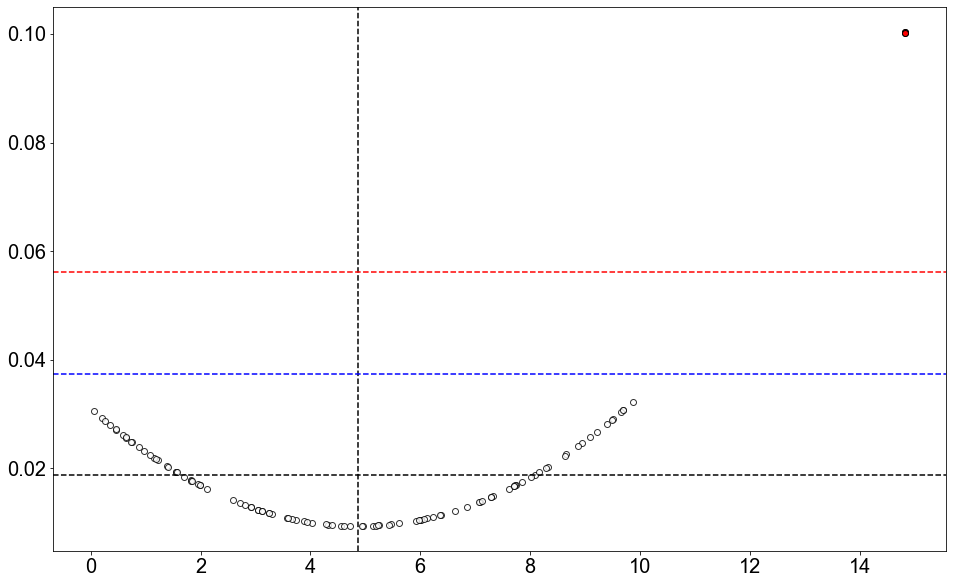

In [131]:
h = leverage
hi_lev_y = []
hi_lev_x = []
for i in range(len(h)):
    if h[i]>3*np.mean(h):
        hi_lev_y.append(h[i])
        hi_lev_x.append(x_out_all2.iloc[i])

plt.scatter(x_out_all2,h,color = 'white', edgecolor = 'k',alpha = 0.8)
plt.scatter(hi_lev_x,hi_lev_y, color = 'red',edgecolor = 'k')
plt.axvline(np.mean(x_out_all2).values,linestyle = '--',color = 'k')
plt.axhline(np.mean(h),linestyle = '--',color = 'k')
plt.axhline(2*np.mean(h),linestyle = '--',color = 'blue')
plt.axhline(3*np.mean(h),linestyle = '--',color = 'red')

Die einflussreichsten Punkte werden klar herausgestellt.

### Cook-Abstand

Eine weitere Methode zur Erfassung einflussreicher Ausreißer ist der <a href="https://en.wikipedia.org/wiki/Cook%27s_distance">Cook-Abstand</a>. Das Maß ist eine Kombination aus Leverage und Residuen der einzelnen Beobachtungen. Je höher die Hebelwirkung und der Rückstand, desto größer ist der Cook-Abstand. Normalerweise werden Punkte mit einem Cook-Abstand von mehr als $1$ als einflussreich eingestuft. In Python wird der Cook-Abstand mit der Methode `cooks.distance()` berechnet.

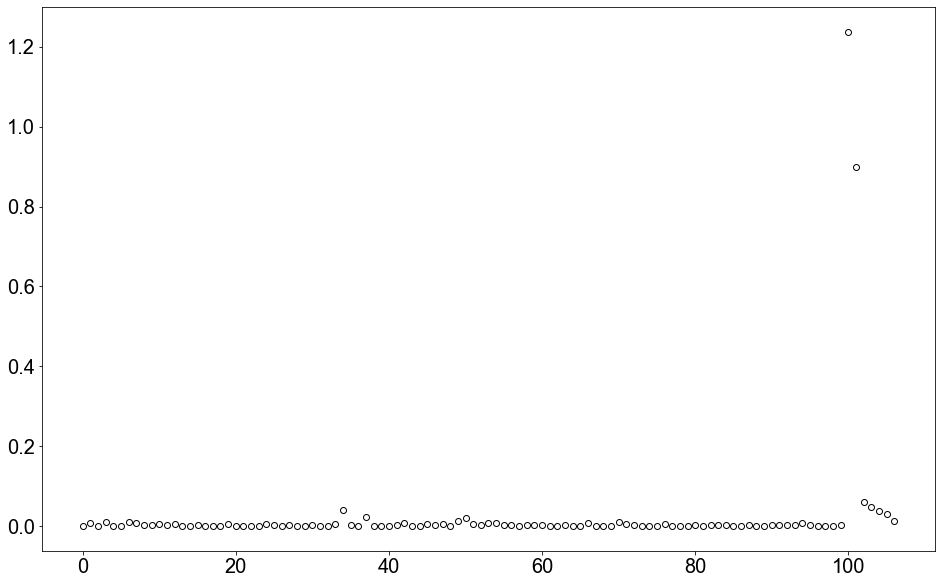

In [175]:
influence = model4.get_influence()
cooks = list(influence.cooks_distance)
import functools
import operator
#cooks = functools.reduce(operator.iconcat, cooks, [])
#len(cooks)
cooks_x = list(range(len(cooks[0])))
plt.scatter(cooks_x,cooks[0],color = 'white',edgecolor = 'k')
#cooks

Die Grafik zeigt sehr deutlich die einflussreichsten Punkte des Modells.

### Andere nützliche Regressionsdiagnosen

Weitere nützliche Werkzeuge für die Regressionsanalysediagnose sind die Methode `dffits()`, die angibt, wie sehr eine Beobachtung den zugehörigen angepassten Wert beeinflusst, und die Methode `dfbetas()`, die die Änderung der geschätzten Parameter angibt, wenn eine Beobachtung im Verhältnis zu ihrem Standardfehler ausgeschlossen wird. Die Methode `dfbetas()` gibt ein Matrixobjekt zurück; daher wenden wir die Funktion `plot()` an, um die Ausgabe darzustellen. Die blaue Linie entspricht $\beta_0$, dem Achsenabschnitt, und die orange Linie entspricht dem Effekt für $\beta_1$, dem Regressionskoeffizienten (Dalgaard 2008).

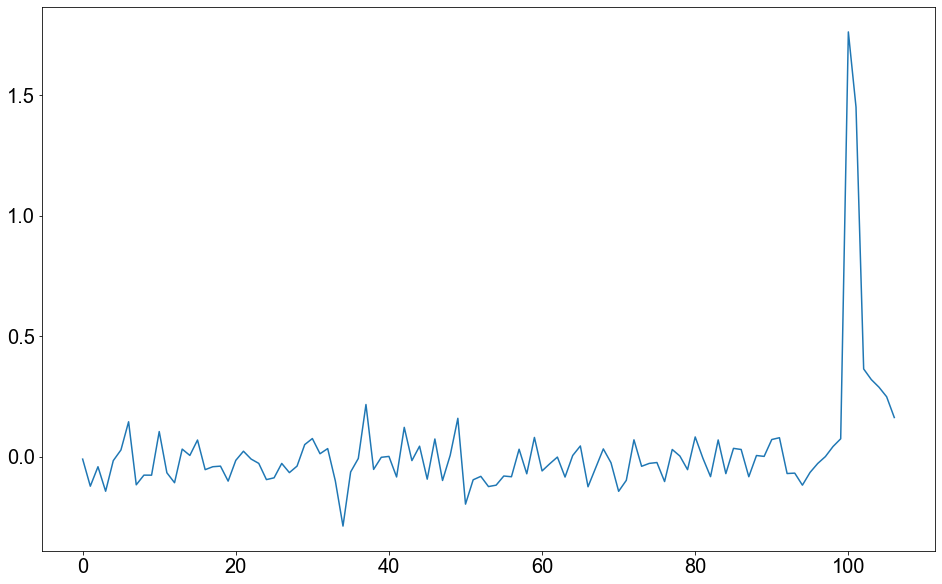

In [197]:
ddfits = influence = model4.get_influence().dffits
plt.plot(ddfits[0])


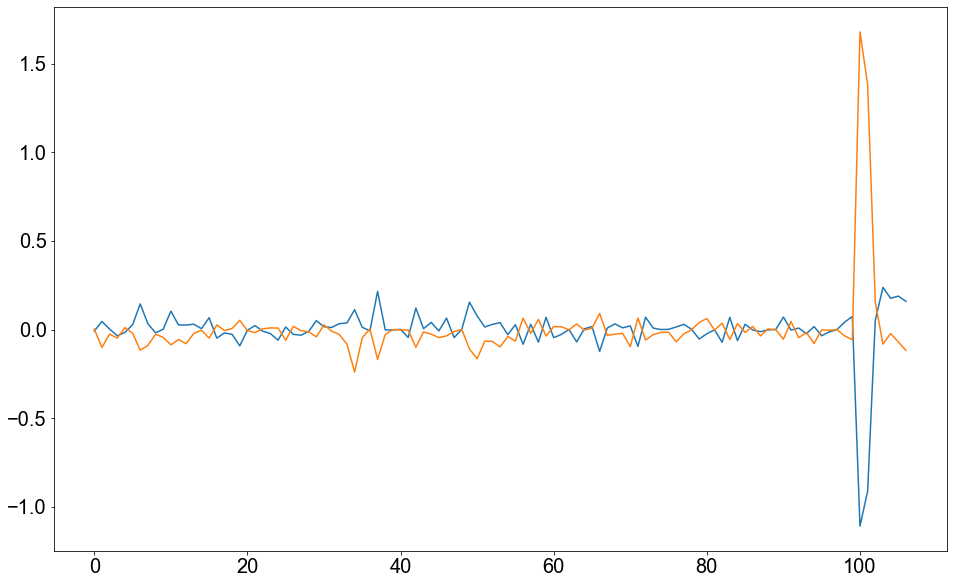

In [198]:
dfbetas = influence = model4.get_influence().dfbetas
plt.plot(dfbetas)